In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [2]:
dataset_train = pd.read_csv('stumbleupon-challenge-master//train.tsv', sep='\t')
dataset_test = pd.read_csv('stumbleupon-challenge-master//test.tsv', sep ='\t', usecols = ['urlid', 'boilerplate'])

# Data Exploration of train dataset 

In [3]:
dataset_train.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0


From above, we can say that dataset contain 27 features

In [4]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

In [5]:
dataset_train.columns

Index(['url', 'urlid', 'boilerplate', 'alchemy_category',
       'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label'],
      dtype='object')

# Columns Description

url : Url of the webpage to be classified

urlid: StumbleUpon's unique identifier for each url

boilerplate: Boilerplate text

alchemy_category: Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)

alchemy_category_score: Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)

avglinksize: Average number of words in each link

commonLinkRatio_1: # of links sharing at least 1 word with 1 other links / # of links

commonLinkRatio_2: # of links sharing at least 1 word with 2 other links / # of links

commonLinkRatio_3: # of links sharing at least 1 word with 3 other links / # of links

commonLinkRatio_4: # of links sharing at least 1 word with 4 other links / # of links

compression_ratio: Compression achieved on this page via gzip (measure of redundancy)

embed_ratio: Count of number of usage

frameBased: A page is frame-based (1) if it has no body markup but have a frameset markup

frameTagRatio: Ratio of iframe markups over total number of markups

hasDomainLink: True (1) if it contains url with domain

html_ratio: Ratio of tags vs text in the page

image_ratio: Ratio of image text vs text in the page

is_news: True (1) if StumbleUpon's news classifier determines that this webpage is news

lengthyLinkDomain: True (1) if at least 3 domain's text contains more than 30 alphanumeric characters

linkwordscore: Percentage of words on the page that are in hyperlink's text

news_front_page: True (1) if StumbleUpon's news classifier determines that this webpage is front-page news

on_markup_alphanum_characters: Page's text's number of alphanumeric characters

numberOfLinks: Number of Links markups

numwords_in_url: Number of words in url

parametrizedLinkRatio: A link is parametrized if it's url contains parameters or has an attached onClick event

spelling_errors_ratio: Ratio of words not found in wiki (considered to be a spelling mistake)

label: User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

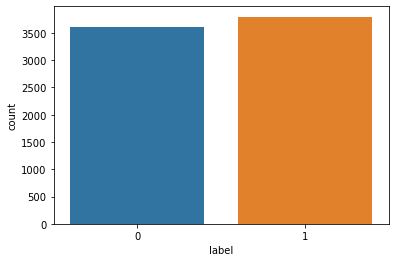

In [6]:
plt.Figure(figsize = (12,6))
sns.countplot(dataset_train['label'])

In [7]:
dataset_train['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

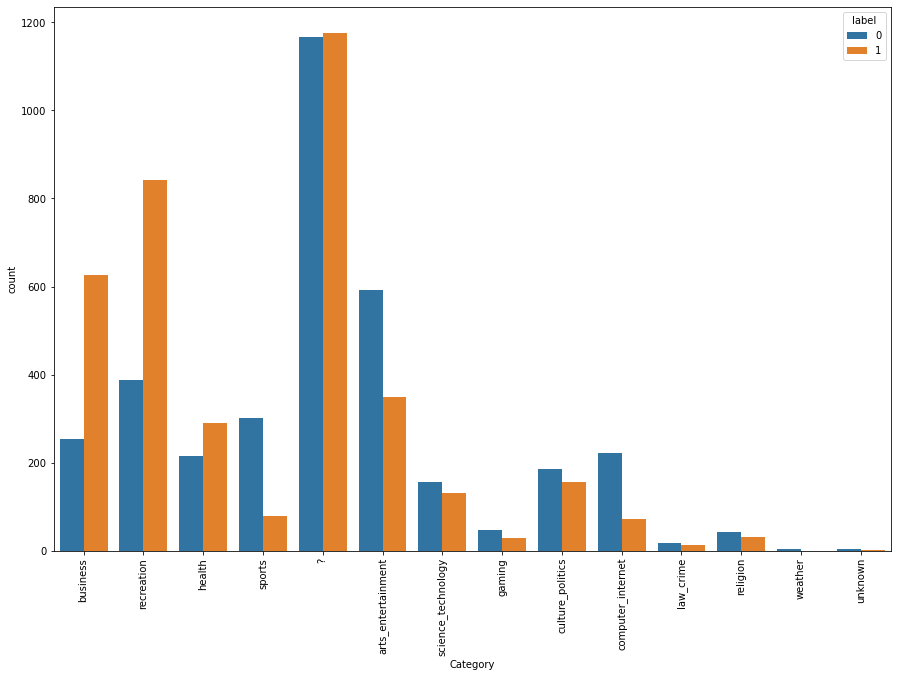

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(x=dataset_train['alchemy_category'],hue=dataset_train['label']);
plt.xlabel('Category');
plt.xticks(rotation=90);

From above countplot, we can say that:
1. Bussiness, Recreation and Health are mostly categories as Evergreen.
2. Sports, Arts_entertainment and Computer_internet categories are mostly Non-evergreen.

# Cleaning the Boilerplate Feature

In [9]:
#cleaning the train dataset using regex and replace command
dataset_train['boilerplate'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
dataset_train['boilerplate'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)
dataset_train['boilerplate'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)

#converting the whole words in boilerplat feature in lower alphabets
dataset_train['boilerplate']=dataset_train['boilerplate'].str.lower()

In [10]:
#cleaning the test dataset using regex and replace command
dataset_test['boilerplate'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
dataset_test['boilerplate'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)
dataset_test['boilerplate'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)

#converting the whole words in boilerplat feature in lower alphabets
dataset_test['boilerplate']=dataset_test['boilerplate'].str.lower()

# Importing the tokenizer from transformer library and BERT Model

In [11]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Adding all veriable for transformers model i.e., Bert Model and assigning the max token size which Bert model can handle

In [12]:
token_size=512
#creating X and Y matrix for dataset_train
Xids=np.zeros((dataset_train.shape[0],token_size))
Xmask=np.zeros((dataset_train.shape[0],token_size))
y=np.zeros((dataset_train.shape[0],1))

#creating X and Y matrix for dataset_test
Xids_test=np.zeros((dataset_test.shape[0],token_size))
Xmask_test=np.zeros((dataset_test.shape[0],token_size))

In [13]:
#Assigning the token's value to Xids, Xmask and y matrix from dataset_train using for loop
for i,sequence in enumerate(dataset_train['boilerplate']):
    tokens=tokenizer.encode_plus(sequence,max_length=token_size,padding='max_length',add_special_tokens=True,
                           truncation=True,return_token_type_ids=False,return_attention_mask=True,
                           return_tensors='tf')
    
    Xids[i,:],Xmask[i,:],y[i,0]=tokens['input_ids'],tokens['attention_mask'],dataset_train.loc[i,'label']

In [14]:
#Assigning the token's value to Xids_test and Xmask_test matrix from dataset_test using for loop
for i,sequence in enumerate(dataset_test['boilerplate']):
    tokens=tokenizer.encode_plus(sequence,max_length=token_size,padding='max_length',add_special_tokens=True,
                           truncation=True,return_token_type_ids=False,return_attention_mask=True,
                           return_tensors='tf')
    
    Xids_test[i,:],Xmask_test[i,:]=tokens['input_ids'],tokens['attention_mask']

In [15]:
#Checking the shape to train dataset
Xids.shape

(7395, 512)

In [16]:
#Checking the devices available for tensorflow
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [17]:
#preparing the train dataset for the model
data_train=tf.data.Dataset.from_tensor_slices((Xids,Xmask,y))

def map_func(input_ids,mask,labels):
    return {'input_ids':input_ids,'attention_mask':mask},labels

data_train=data_train.map(map_func)
data_train=data_train.shuffle(100000).batch(32).prefetch(1000)

DS_size=len(list(data_train))

train=data_train.take(round(DS_size*0.85))
val=data_train.skip(round(DS_size*0.85))

In [18]:
#Preparing the test dataset

data_test=tf.data.Dataset.from_tensor_slices((Xids_test,Xmask_test))

def map_func(input_ids,mask):
    return {'input_ids':input_ids,'attention_mask':mask}

data_test=data_test.map(map_func)
data_test=data_test.batch(32).prefetch(1000)

# Building the Model

In [19]:
from transformers import TFDistilBertModel, DistilBertConfig
distil_bert = 'distilbert-base-uncased'

config = DistilBertConfig(dropout=0.2, attention_dropout=0.2)
config.output_hidden_states = False
transformer_model = TFDistilBertModel.from_pretrained(distil_bert, config = config)

input_ids_in = tf.keras.layers.Input(shape=(token_size,), name='input_ids', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(token_size,), name='attention_mask', dtype='int32') 

embedding_layer = transformer_model(input_ids_in, attention_mask=input_masks_in)[0]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_transform', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [20]:
X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(embedding_layer)
X = tf.keras.layers.GlobalMaxPool1D()(X)
X = tf.keras.layers.Dense(50, activation='relu')(X)
X = tf.keras.layers.Dropout(0.2)(X)
X = tf.keras.layers.Dense(1, activation='sigmoid')(X)
model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)

for layer in model.layers[:3]:
  layer.trainable = False

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB TFBaseModelOutput(la 66362880    input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 512, 100)     327600      tf_distil_bert_model[0][0]   

In [23]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [24]:
#fitting the train dataset in model with epochs=1 as it takes 2-3hr to train
history=model.fit(train,validation_data=val,epochs=1)

197/197 [==============================] - 12455s 63s/step - loss: 0.5191 - auc: 0.8123 - precision: 0.7772 - recall: 0.7384 - val_loss: 0.4394 - val_auc: 0.8835 - val_precision: 0.7979 - val_recall: 0.8282


# Predicting the Labels for test dataset

In [25]:
predictions=model.predict(data_test)

# Creating the label column in test dataset and saving them as a submission.csv file

In [29]:
dataset_test['Label'] = predictions

In [30]:
dataset_test.to_csv('stumbleupon-challenge-master//submission.csv', columns =['urlid', 'Label'], index=False)

# Precision and Recall for each Classes

In [31]:
input_x=tf.data.Dataset.from_tensor_slices((Xids,Xmask,y))

def map_func(input_ids,mask,labels):
    return {'input_ids':input_ids,'attention_mask':mask}

input_x=input_x.map(map_func)
input_x=input_x.shuffle(100000).batch(32).prefetch(1000)

y_true = y

In [32]:
y_pred=model.predict(data_train)
y_pred = np.round(y_pred)
y_pred

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [33]:
from sklearn import metrics
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.48      0.47      0.48      3599
         1.0       0.51      0.52      0.51      3796

    accuracy                           0.50      7395
   macro avg       0.49      0.49      0.49      7395
weighted avg       0.50      0.50      0.50      7395

